In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [6]:
downloaded = drive.CreateFile({'id':'1arCGQ3IyOARN0pl3eAOsjsSbEKxP996C'}) # replace the id with id of file you want to access
downloaded.GetContentFile('BTC-USD.csv') 


In [8]:
import pandas as pd
df = pd.read_csv('BTC-USD.csv')
df = df[["Date", "Close"]]
df.columns = ["ds", "y"]
print(df)


             ds             y
0    2020-05-22   9182.577148
1    2020-05-23   9209.287109
2    2020-05-24   8790.368164
3    2020-05-25   8906.934570
4    2020-05-26   8835.052734
..          ...           ...
361  2021-05-18  42909.402344
362  2021-05-19  37002.441406
363  2021-05-20  40782.738281
364  2021-05-21  37304.691406
365  2021-05-22  38661.265625

[366 rows x 2 columns]


In [10]:
from fbprophet import Prophet
prophet = Prophet()
prophet.fit(df)
future = prophet.make_future_dataframe(periods=365)
print(future)


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds
0   2020-05-22
1   2020-05-23
2   2020-05-24
3   2020-05-25
4   2020-05-26
..         ...
726 2022-05-18
727 2022-05-19
728 2022-05-20
729 2022-05-21
730 2022-05-22

[731 rows x 1 columns]


In [11]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(200)

,ds,yhat,yhat_lower,yhat_upper
531,2021-11-04,45832.017268,28182.013850,64444.279565
532,2021-11-05,45946.222121,27937.063537,64372.039847
533,2021-11-06,45936.238557,28637.697013,64429.382755
534,2021-11-07,45898.761398,27239.958466,64020.926205
535,2021-11-08,45895.453674,26915.214032,64371.084080
...,...,...,...,...
726,2022-05-18,38079.997132,-21062.758538,94364.865127
727,2022-05-19,37977.675344,-21180.302691,94176.650203
728,2022-05-20,38091.880198,-21919.233205,95130.693575
729,2022-05-21,38081.896633,-21959.239188,96129.422435


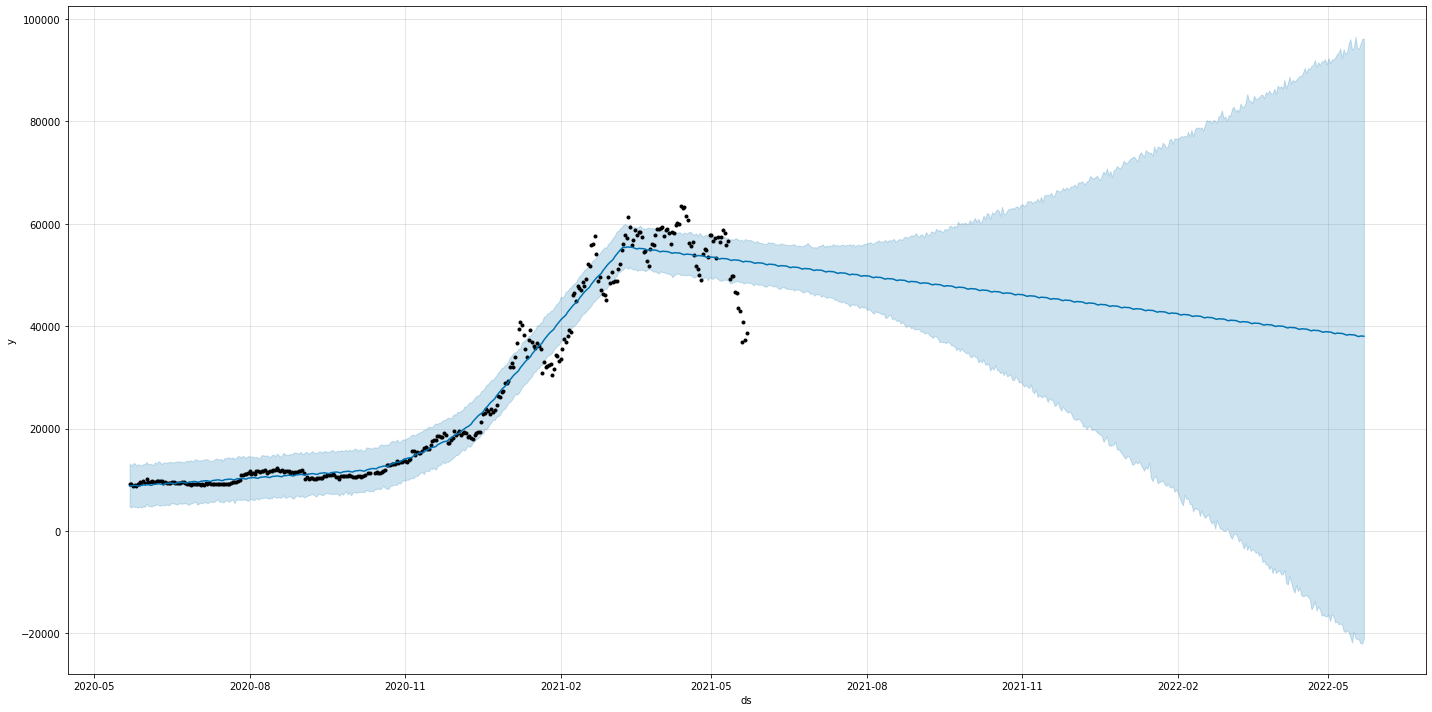

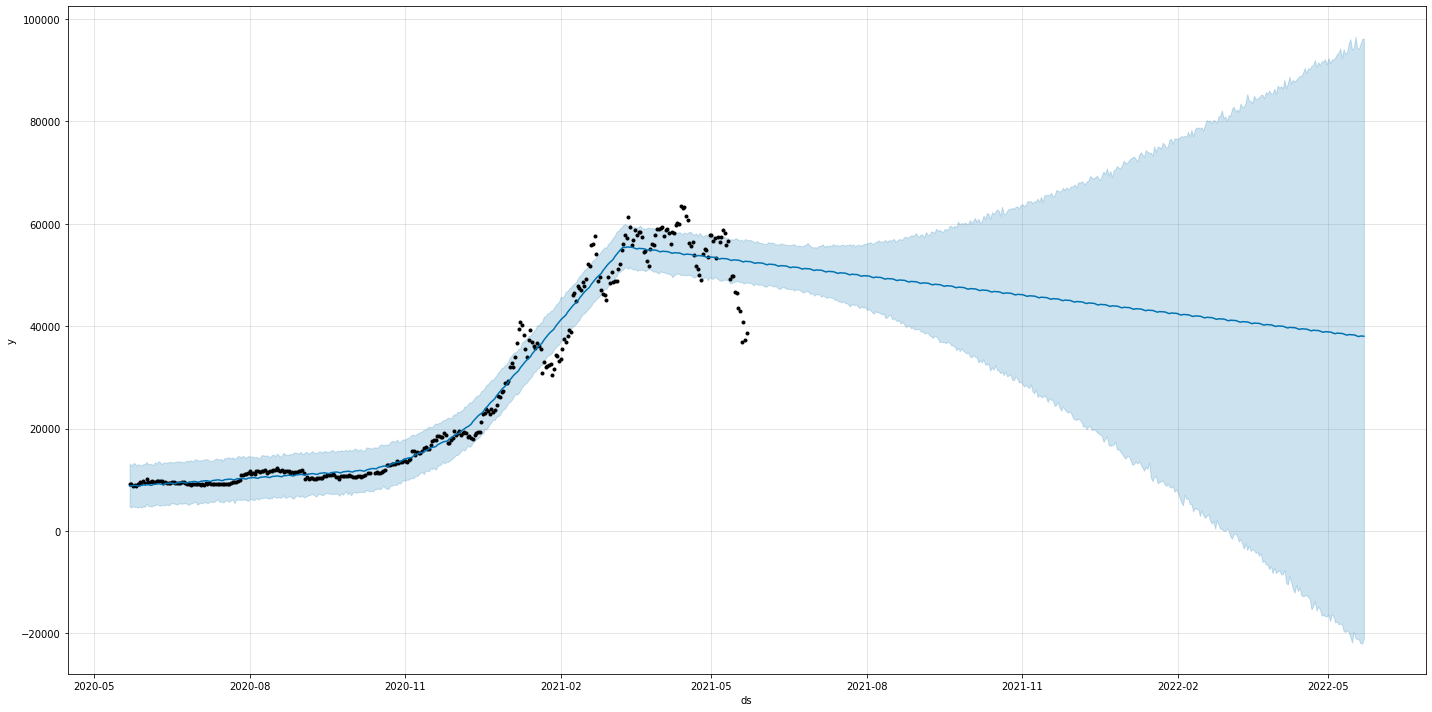

In [13]:
from fbprophet.plot import plot
prophet.plot(forecast, figsize=(20, 10))